Data Collection from Yahoo finance(Free open source) 

In [1]:
#Importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.fft import fft, ifft,fftfreq

In [2]:
# Defining the ticker symbol for Apple 
ticker_symbol = 'AAPL'

# Get data for the ticker symbol
df = yf.download(ticker_symbol,start = '2004-01-01').iloc[::-1]

#Change date index to datetime type
df.index = pd.to_datetime(df.index)

[*********************100%%**********************]  1 of 1 completed


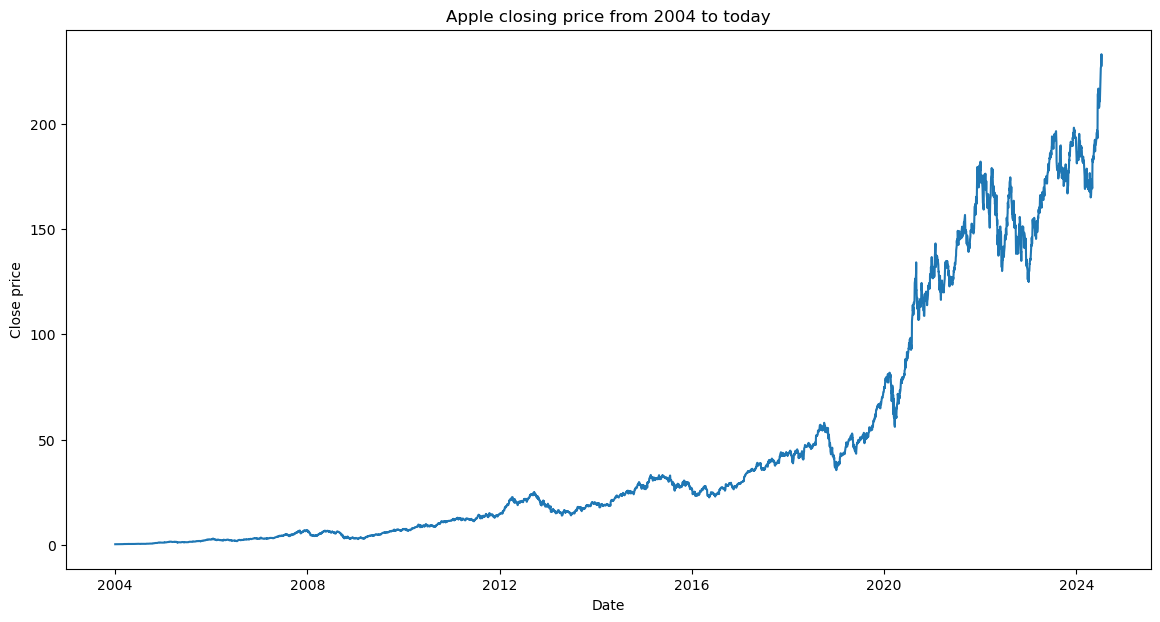

In [3]:
#Plotting lineplot from 2004 to todays date
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label = "APPL closing price")
plt.title('Apple closing price from 2004 to today')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [4]:
#Visualisation of volume plot

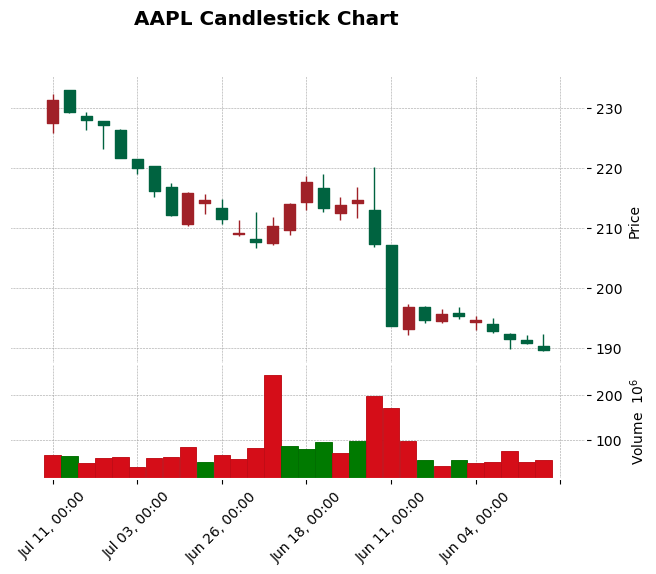

In [5]:
#candlestick chart for last 30 days to find out any recurring pattern 
import mplfinance as mpf
mpf.plot(df.iloc[0:30], type='candle', style='charles', title='AAPL Candlestick Chart', volume=True)


[]

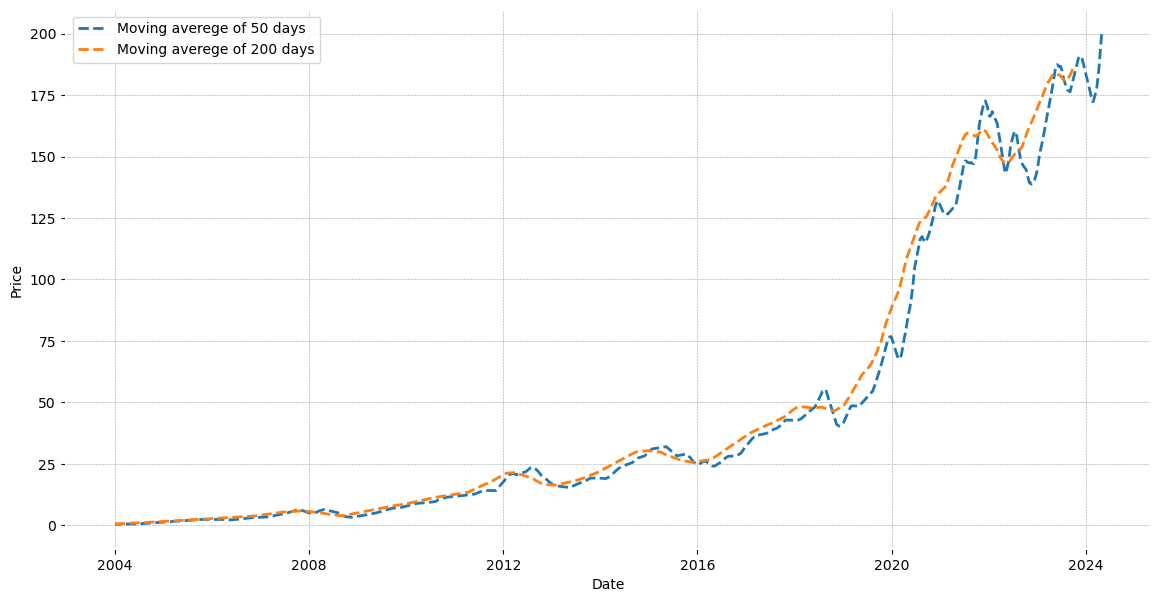

In [6]:
#Now let us visualize moving average for the data
close_mean_50 = df['Close'].rolling(window = 50).mean()
close_mean_200 = df['Close'].rolling(window = 200).mean()

#Plotting the data
plt.figure(figsize = (14,7))
plt.plot(close_mean_50 ,label = "Moving averege of 50 days",linestyle ='--')
plt.plot(close_mean_200 ,label = "Moving averege of 200 days",linestyle ='--')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.plot()

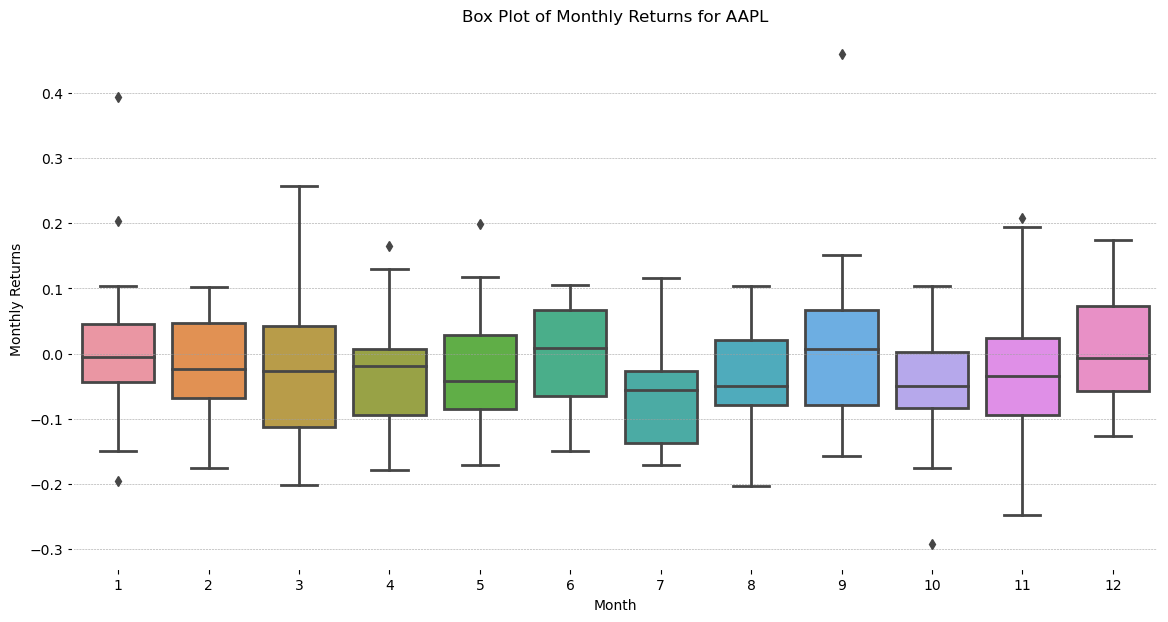

In [7]:
#  Box Plot of Monthly Returns
returns = df['Close'].pct_change().dropna()
returns_df = returns.to_frame()
returns_df['YearMonth'] = returns_df.index.to_period('M')
monthly_returns = returns_df.groupby('YearMonth')['Close'].sum()

plt.figure(figsize=(14, 7))
sns.boxplot(x=monthly_returns.index.month, y=monthly_returns)
plt.title('Box Plot of Monthly Returns for AAPL')
plt.xlabel('Month')
plt.ylabel('Monthly Returns')
plt.show()

# Starting fourier transformation



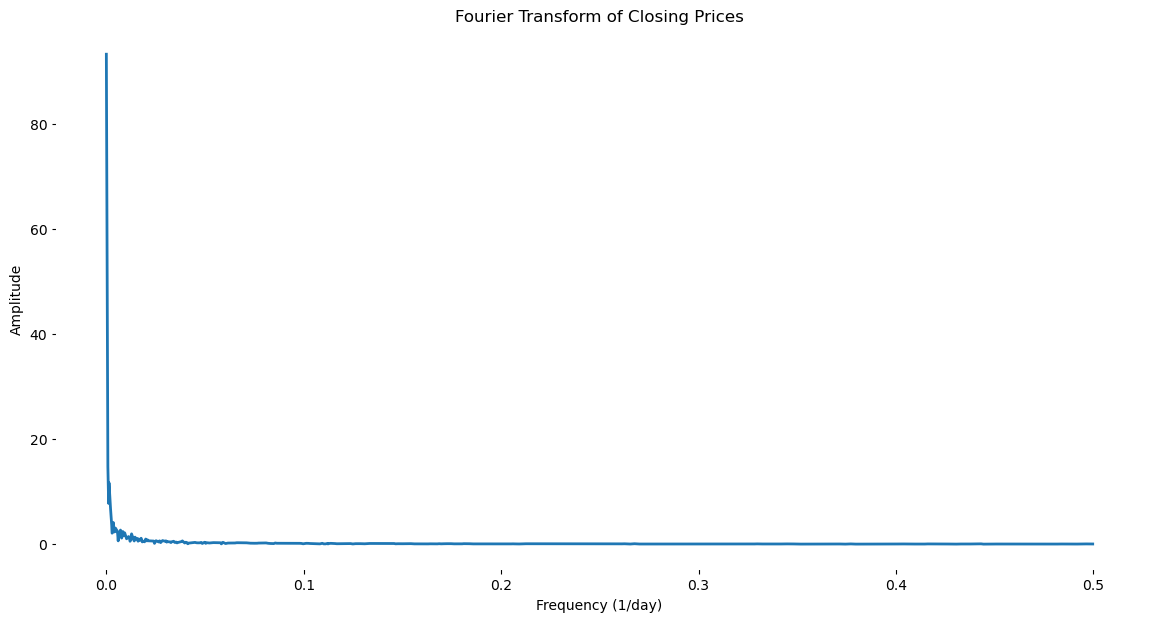

In [8]:
# Select the 'Close' price for Fourier Transform
close_prices = df['Close'].values
n = len(close_prices)
T = 1.0  # Assuming data is daily; adjust if the frequency is different
yf = fft(close_prices)
xf = fftfreq(n, T)[:n // 2]

# Plotting the Fourier Transform
plt.figure(figsize=(14, 7))
plt.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
plt.title('Fourier Transform of Closing Prices')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()